In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib 
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [6]:
fraud_count = df['Class'].value_counts()
print(fraud_count)

0    284315
1       492
Name: Class, dtype: int64


Text(0.5, 1.0, 'Fraud count in the dataset')

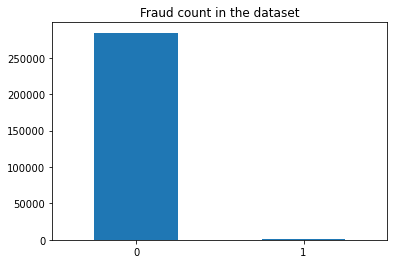

In [7]:
fraud_count.plot(kind ='bar', rot = 0)
plt.title('Fraud count in the dataset')

Text(0.5, 1.0, 'Time vs Amount')

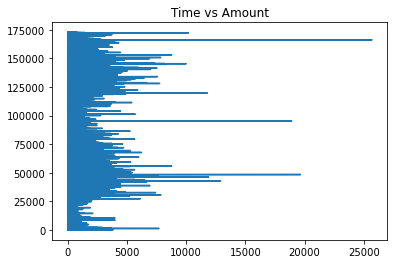

In [8]:
x= df['Amount']
y= df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')

<AxesSubplot:xlabel='Time', ylabel='Amount'>

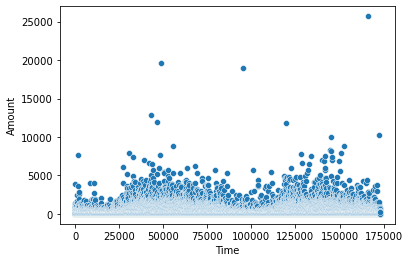

In [9]:
sns.scatterplot(data = df, x ='Time', y='Amount')

<AxesSubplot:>

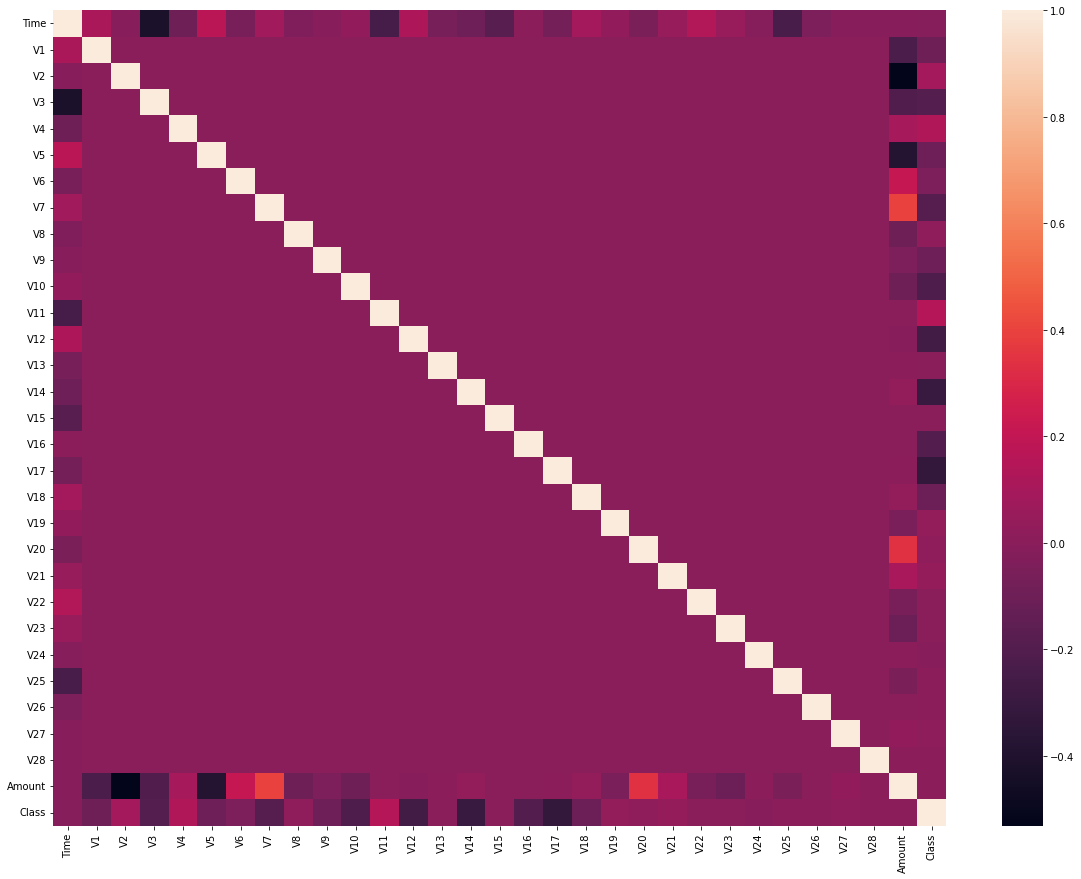

In [10]:
matrix = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(matrix)

In [11]:
data = df.sample(frac= 0.1,random_state= 1)
data.shape

(28481, 31)

In [22]:
data.Class.value_counts()

0    28432
1       49
Name: Class, dtype: int64

<AxesSubplot:xlabel='V1', ylabel='V2'>

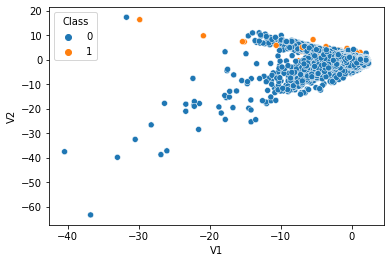

In [23]:
sns.scatterplot(data=data, x ='V1', y='V2', hue = 'Class')

In [26]:
import imblearn
from imblearn.over_sampling import SMOTE`

In [34]:
smote = SMOTE(random_state=101)
X = data.drop(['Class'], axis =1)
Y = data['Class']
X_ovs, Y_ovs = smote.fit_resample(X,Y)

C:\Users\Ideapad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

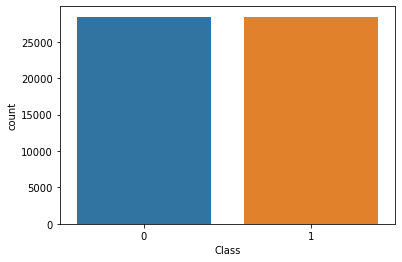

In [39]:
sns.countplot(Y_ovs)

In [24]:
Xtrain,Xtest, Ytrain,Ytest = train_test_split(X_ovs,Y_ovs,test_size =0.2, random_state =42)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [40]:
lr = LogisticRegression()
lr.fit(Xtrain,Ytrain)

C:\Users\Ideapad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = lr.predict(Xtest)

In [42]:
accuracy = lr.score(Xtest,Ytest)
print(accuracy)

0.9984202211690363


In [44]:
cm = confusion_matrix(Ytest,y_pred)
print(cm)

[[5685    5]
 [   4    3]]
